In [2]:
from torchvision import models

In [3]:
"""
Models with capital letters are classes of untrained architecture implementations
Lower cases are functions for instantiating the models given parameters, including whether or
not the model is pretrained.
"""

dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [4]:
# AlexNet
# This model is instantiated without trained parameters

alexnet = models.AlexNet()

## ResNet classification

In [5]:
# Pretrained ResNet

resnet = models.resnet101(pretrained=True)

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Image loaded:


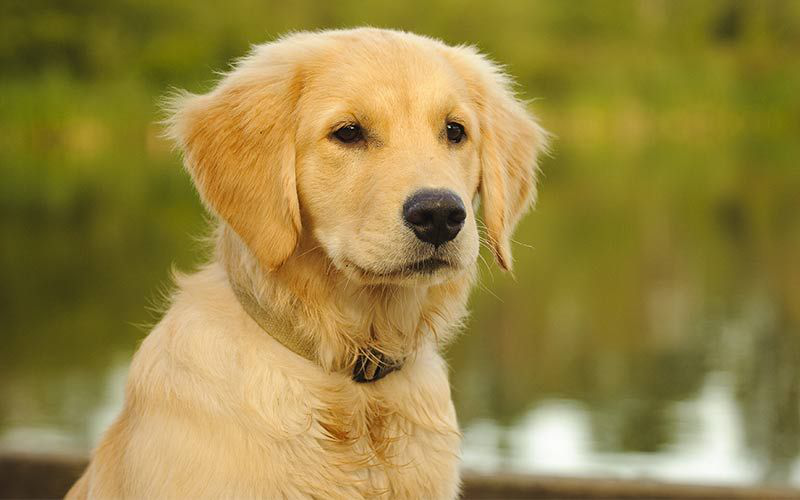

In [7]:
# Load in some new data

from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

from PIL import Image
img = Image.open("../data/image_classification/cindy.jpg")
print("Image loaded:")
display(img)

In [8]:
import torch

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0) # Create 1-image batch for model processing
print(batch_t)

tensor([[[[-0.2342, -0.2342, -0.1999,  ..., -0.0116, -0.0116, -0.0287],
          [-0.1828, -0.1828, -0.1486,  ...,  0.0056,  0.0056,  0.0056],
          [-0.1657, -0.1657, -0.1486,  ...,  0.0227,  0.0227,  0.0227],
          ...,
          [ 1.7009,  1.6838,  1.6667,  ...,  1.1015,  1.1015,  1.0844],
          [ 1.7352,  1.6838,  1.6838,  ...,  1.2385,  1.2385,  1.2043],
          [ 1.7180,  1.6495,  1.6495,  ...,  1.3242,  1.3242,  1.2899]],

         [[-0.1625, -0.1625, -0.1275,  ...,  0.0301,  0.0301,  0.0301],
          [-0.1450, -0.1450, -0.1099,  ...,  0.0476,  0.0476,  0.0476],
          [-0.1275, -0.1275, -0.0924,  ...,  0.0651,  0.0651,  0.0651],
          ...,
          [ 1.2731,  1.2381,  1.2206,  ...,  1.4307,  1.4307,  1.4132],
          [ 1.2556,  1.2031,  1.2031,  ...,  1.5707,  1.5707,  1.5532],
          [ 1.2381,  1.1681,  1.1681,  ...,  1.6583,  1.6583,  1.6583]],

         [[-1.5430, -1.5430, -1.5256,  ..., -1.3861, -1.3861, -1.3861],
          [-1.5779, -1.5779, -

In [9]:
# Put model in eval mode for inference

resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
# Run inference on img

out = resnet(batch_t)
out

tensor([[-1.0775e+00,  2.4890e-01, -3.0966e+00, -4.2508e+00, -3.7809e+00,
         -2.2478e+00, -4.3049e+00, -2.0160e+00,  2.1870e-01, -3.4187e+00,
          1.4514e+00,  9.3047e-01, -3.7864e-01, -9.5023e-01,  1.7139e-01,
         -4.4740e-01, -9.2620e-01,  1.7742e-01, -4.3933e-01, -2.1918e-02,
         -1.0731e+00, -1.6271e+00, -2.0292e-01,  1.1597e+00, -4.9034e-01,
          8.4369e-01, -9.6434e-01, -4.3570e-01, -1.5642e-01, -1.5168e+00,
         -8.8705e-01, -2.0786e+00, -1.5358e+00, -1.9729e+00, -7.8792e-01,
         -1.2952e+00,  2.9393e-02, -1.3761e+00,  1.0055e-01,  5.4184e-01,
          2.8320e-01,  2.2079e-01,  2.6048e+00, -1.1552e+00, -1.3041e+00,
         -1.0293e+00,  2.5172e+00,  1.0271e+00, -1.6578e+00, -2.6595e-01,
         -7.9925e-01, -2.0075e+00, -1.4177e+00, -7.7409e-01, -1.9284e+00,
         -6.3314e-01, -1.1463e+00,  1.3780e-01, -1.3264e+00, -1.4618e-02,
          9.3232e-02, -2.0872e+00, -7.1266e-01, -1.7419e+00, -1.2347e+00,
         -1.9457e+00, -1.6793e+00, -8.

In [11]:
# Match highest output probability to label to specify winning prediction

with open("../data/image_classification/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]
    
# Get index of max softmax probability to retrieve label of the same index
# index retrieved is still a tensor, so [0] is required to get the index integer
_, index = torch.max(out, 1)

# Normalise outputs to with range [0, 1] using softmax, then show label and confidence
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 98.74565124511719)

In [12]:
# Get top-n predictions/classifications by sorting probabilities

_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 98.74565124511719),
 ('Labrador retriever', 0.7711241245269775),
 ('flat-coated retriever', 0.1634877771139145),
 ('tennis ball', 0.14055970311164856),
 ('Brittany spaniel', 0.028343800455331802)]

## CycleGAN horse-to-zebra converter

In [13]:
# Some custom setup code from https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch2/3_cyclegan.ipynb
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):
    
    """
    Module for the Generator component of the CycleGAN
    """

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [14]:
# Instantiate generator
netG = ResNetGenerator()
netG

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [17]:
# Load pretrained generator weights
# These were downloaded from https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/horse2zebra_0.4.0.pth

model_path = "../data/cyclegan/horse2zebra_0.4.0.pth"
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [18]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

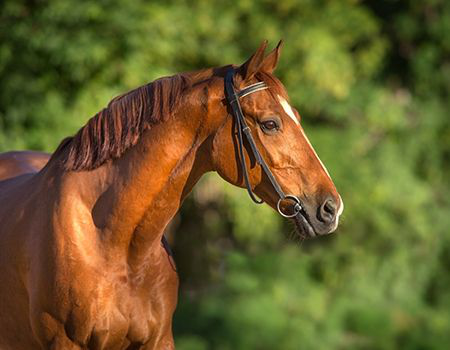

In [20]:
# Ready horse image for inference (transformation)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

img = Image.open("../data/cyclegan/horse.jpg")
img

In [22]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_t

tensor([[[[0.0549, 0.0627, 0.0824,  ..., 0.2039, 0.2000, 0.2000],
          [0.0549, 0.0667, 0.0902,  ..., 0.2000, 0.2039, 0.2078],
          [0.0627, 0.0745, 0.0980,  ..., 0.2000, 0.2039, 0.2118],
          ...,
          [0.3490, 0.3412, 0.3373,  ..., 0.2627, 0.2667, 0.2706],
          [0.3765, 0.3569, 0.3451,  ..., 0.2588, 0.2627, 0.2706],
          [0.4078, 0.3843, 0.3647,  ..., 0.2549, 0.2627, 0.2706]],

         [[0.0863, 0.0980, 0.1216,  ..., 0.2549, 0.2588, 0.2588],
          [0.0863, 0.1020, 0.1294,  ..., 0.2510, 0.2627, 0.2667],
          [0.0980, 0.1098, 0.1373,  ..., 0.2510, 0.2627, 0.2706],
          ...,
          [0.2078, 0.2000, 0.1961,  ..., 0.3765, 0.3725, 0.3647],
          [0.2314, 0.2157, 0.2039,  ..., 0.3804, 0.3725, 0.3647],
          [0.2588, 0.2353, 0.2196,  ..., 0.3765, 0.3725, 0.3647]],

         [[0.0353, 0.0353, 0.0314,  ..., 0.0941, 0.0941, 0.0980],
          [0.0275, 0.0314, 0.0353,  ..., 0.0902, 0.1020, 0.1059],
          [0.0275, 0.0314, 0.0392,  ..., 0

In [23]:
# Inference

batch_out = netG(batch_t)

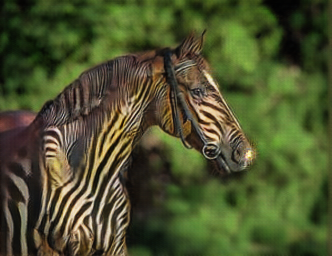

In [24]:
# Convert the output of the generator back to an image as follows...

out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save("../") # save the result if you want
out_img

## Image captioning for scene description

See "ImageCaptioning.pytorch", in the ../models directory. The model therein does image captioning for scene description (based on NeuralTalk2 by Andrej Karpathy). Inference can be run as follows from the root of the directory:

```shell
python eval.py --model ./data/FC/fc-model.pth --infos_path ./data/FC/fc-infos.pkl --image_folder ./data
```

You will need to copy an image into the local `./data` directory - such as that of the horse previously used - in order to generate a description.